In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
column_names = ['age', 'year of operation', 'axillary nodes detected', 'Survival status']
data = pd.read_csv('haberman.csv',names=column_names )

In [4]:
data.head()

,age,year of operation,axillary nodes detected,Survival status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [6]:
data.shape

(306, 4)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      306 non-null    int64
 1   year of operation        306 non-null    int64
 2   axillary nodes detected  306 non-null    int64
 3   Survival status          306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [5]:
data.describe()

,age,year of operation,axillary nodes detected,Survival status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [8]:
data["Survival status"] = data["Survival status"].astype("category")

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      306 non-null    int64   
 1   year of operation        306 non-null    int64   
 2   axillary nodes detected  306 non-null    int64   
 3   Survival status          306 non-null    category
dtypes: category(1), int64(3)
memory usage: 7.7 KB


In [10]:
data.value_counts("Survival status")

Survival status
1    225
2     81
Name: count, dtype: int64

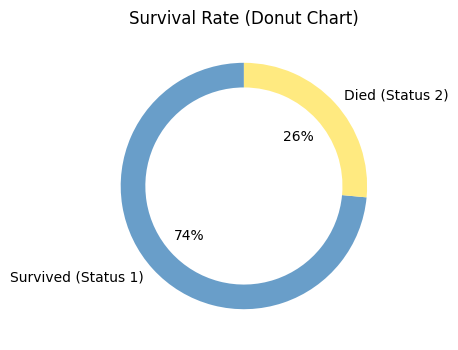

In [16]:
slices = data["Survival status"].value_counts()
labels = ["Survived (Status 1)", "Died (Status 2)"]
colors = ["#699ec9", "#ffea80"]


plt.figure(figsize=(4, 4)) 
plt.pie(x=slices, labels=labels, colors=colors, autopct="%1.0f%%", startangle=90, wedgeprops=dict(width=0.2))

plt.title("Survival Rate (Donut Chart)")

plt.show()

Observations from the above viz

Out of 306 data-points, 225 data-points belong to class Survived and 81 data-points belong to class Died.
There is class imbalance in the dataset.
74% of data-points belong to class Survived and remaining 26% belong to class Died.

Univariate Analysis : PDF, CDF, Boxplot, Violin Plots to Understand Which Features are Useful Towards Classification

In [18]:
# age 

print("Patient with lowest age:", data["age"].min())
print("Patient with highest age:", data["age"].max())
print("Mean age of Patients:", round(data["age"].mean()))
print("Median age of Patients:", round(data["age"].median()))

Patient with lowest age: 30
Patient with highest age: 83
Mean age of Patients: 52
Median age of Patients: 52


In [27]:
# number of aux nodes

fltr = data["axillary nodes detected"]
aff_nodes = data.loc[fltr, "axillary nodes detected"]

print("Mean axillary nodes detected in Patients:", round(aff_nodes.mean()))
print("Median of axillary nodes detected Patients:", round(aff_nodes.median()))

Mean axillary nodes detected in Patients: 3
Median of axillary nodes detected Patients: 1


In [26]:
# number of aux nodes

fltr = data["axillary nodes detected"] > 0  # Filter to consider only affected nodes.
aff_nodes = data.loc[fltr, "axillary nodes detected"]

print("Mean axillary nodes detected in Patients:", round(aff_nodes.mean()))
print("Median of axillary nodes detected Patients:", round(aff_nodes.median()))

Mean axillary nodes detected in Patients: 7
Median of axillary nodes detected Patients: 4


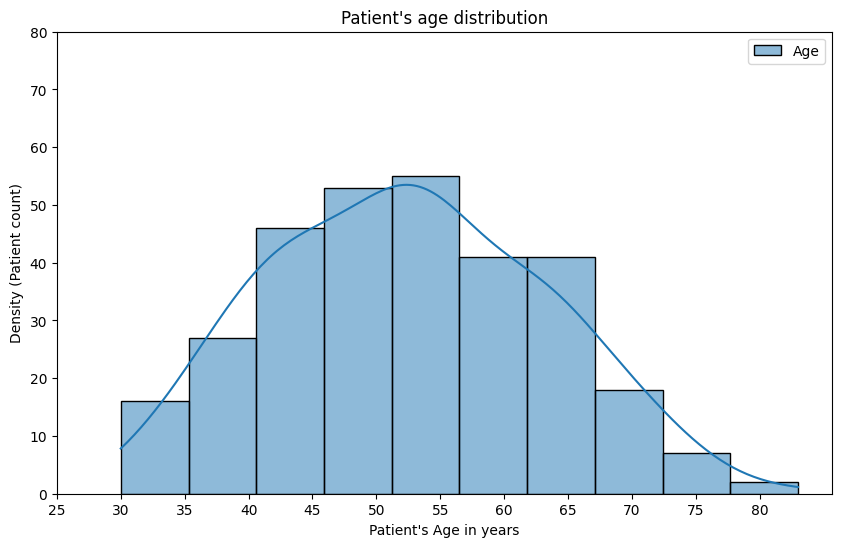

In [32]:
plt.figure(figsize=(10, 6))  # Figure size: width, height

sns.histplot(x=data["age"], label="Age", bins=10, kde=True)
plt.xlabel("Patient's Age in years")
plt.ylabel("Density (Patient count)")
plt.title("Patient's age distribution")
plt.xticks(ticks=range(25, 85, 5))
plt.yticks(ticks=range(0, 90, 10))
plt.legend()

plt.show()

Majority of the patients age is between 45-55 years.